<a href="https://colab.research.google.com/github/MK316/Workingpapers/blob/main/KSAT_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lexical diversity analysis of KSAT data

In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("punkt")

import base64
import requests

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# myread() define

url = "https://raw.githubusercontent.com/MK316/Workingpapers/main/ksat_textfiles/2014.6.txt"

def myread(url):
  req = requests.get(url)
  req = req.text
  return(req)

In [3]:
url1 = "https://raw.githubusercontent.com/MK316/Workingpapers/main/ksat_textfiles/2014.6.txt"
url2 = "https://raw.githubusercontent.com/MK316/Workingpapers/main/ksat_textfiles/2014.9.txt"
url3 = "https://raw.githubusercontent.com/MK316/Workingpapers/main/ksat_textfiles/2014.12.txt"

text1 = myread(url1)
text2 = myread(url2)
text3 = myread(url3)
print('='*40, '\n','Total length (text1, text2, text3): ',len(text1),len(text2),len(text3), ' strings')

# word_tokenize: separating punctuation as individual word items
words1 = word_tokenize(text1)
print('=='*25)
spltxt1=text1.split()
print('* Splitted words by space: ', len(spltxt1))
print('* Total words including punctuation: ', len(words1)); print('=='*25)

words2 = word_tokenize(text2)
spltxt2=text2.split()
print('=='*25)
print('* Splitted words by space: ', len(spltxt2))
print('* Total words including punctuation: ', len(words2)); print('=='*25)

words3 = word_tokenize(text3)
spltxt3=text3.split()
print('=='*25)
print('* Splitted words by space: ', len(spltxt3))
print('* Total words including punctuation: ', len(words3)); print('=='*25)

 Total length (text1, text2, text3):  1907 23503 23576  strings
* Splitted words by space:  448
* Total words including punctuation:  545
* Splitted words by space:  4437
* Total words including punctuation:  5297
* Splitted words by space:  4566
* Total words including punctuation:  5408


## [1]Remove instructions and notations

In [4]:
rawdata1 = text1
rawdata2 = text2
rawdata3 = text3
print("Before processing: ",len(rawdata1),"(string)")
print("Before processing: ",len(rawdata2),"(string)")
print("Before processing: ",len(rawdata3),"(string)")

Before processing:  1907 (string)
Before processing:  23503 (string)
Before processing:  23576 (string)


In [5]:
# Text processing 1: remove special characters (other than alphabets = remove Koreans)
# Numbers remain

import re
noKorean1=re.sub('[^A-Za-z0-9.]+', ' ',rawdata1)
noKorean2=re.sub('[^A-Za-z0-9.]+', ' ',rawdata2)
noKorean3=re.sub('[^A-Za-z0-9.]+', ' ',rawdata3)
print("After processing (No Korean): ",len(noKorean1),"(string)")
print("After processing (No Korean): ",len(noKorean2),"(string)")
print("After processing (No Korean): ",len(noKorean3),"(string)")

After processing (No Korean):  766 (string)
After processing (No Korean):  18707 (string)
After processing (No Korean):  18875 (string)


## Make a function to clean text (additional)

In [6]:
## Cleaning data: remove numbers, punctuations, double space
import string

def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

Var: noKorean => clean_data

In [7]:
clean_data1 = clean_text(noKorean1)
clean_data2 = clean_text(noKorean2)
clean_data3 = clean_text(noKorean3)

In [8]:
cleanwords1 = word_tokenize(clean_data1)
cleanwords2 = word_tokenize(clean_data2)
cleanwords3 = word_tokenize(clean_data3)

print('Number of words: ', len(cleanwords1))
print('Number of words: ', len(cleanwords2))
print('Number of words: ', len(cleanwords3))

Number of words:  135
Number of words:  3201
Number of words:  3307


# Remove stopwords

In [9]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
lowerword1 = []
for w in cleanwords1:
  w1 = w.lower()
  lowerword1.append(w1)
print(len(lowerword1))

lowerword2 = []
for w in cleanwords2:
  w2 = w.lower()
  lowerword2.append(w2)
print(len(lowerword2))

lowerword3 = []
for w in cleanwords3:
  w3 = w.lower()
  lowerword3.append(w3)
print(len(lowerword3))

135
3201
3307


## Stopwords

In [11]:
from nltk.corpus import stopwords  
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("'re"); stopwords.append("n't"); stopwords.append("'ve")
print('N of stopwords: ', len(stopwords))

N of stopwords:  182


Var: cleanwords => lowerword

In [21]:
# Removing stopwords: 'the' 'a' 'to' 'from' etc.

# words = [w for w in lowerword if not w in stopwords.words('english')]
words1 = [w for w in lowerword1 if (not w in stopwords) and (len(w) > 1)]
words2 = [w for w in lowerword2 if (not w in stopwords) and (len(w) > 1)]
words3 = [w for w in lowerword3 if (not w in stopwords) and (len(w) > 1)]
#words1 = [w for w in words1 if len(w) > 1]
reduced1 = len(lowerword1) - len(words1)
reduced2 = len(lowerword2) - len(words2)
reduced3 = len(lowerword3) - len(words3)

print('Summary: before and after stopwords process')
print('='*30)
print('Before stopwords:',len(lowerword1), ',',len(lowerword2),',', len(lowerword3))
print('After stopwords: ',len(words1),'(-%d),'%reduced1, len(words2), '(-%d),'%reduced2, len(words3), '(-%d)'%reduced3); 
print('='*30)
print(words1[:10])

Summary: before and after stopwords process
Before stopwords: 135 , 3201 , 3307
After stopwords:  63 (-72), 1703 (-1498), 1674 (-1633)
['man', 'must', 'enjoyed', 'party', 'lot', 'nice', 'take', 'care', 'baby', 'excited']


## Wordcloud with lexical words

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

In [34]:
# Words to concatenate
wctext1 = ' '.join(words1)
wctext2 = ' '.join(words2)
wctext3 = ' '.join(words3)
print(len(wctext1))
print(len(wctext2))
print(len(wctext3))

364
12327
11841


Text(0.5, 1.0, 'Wordcloud of data 2014. 6')

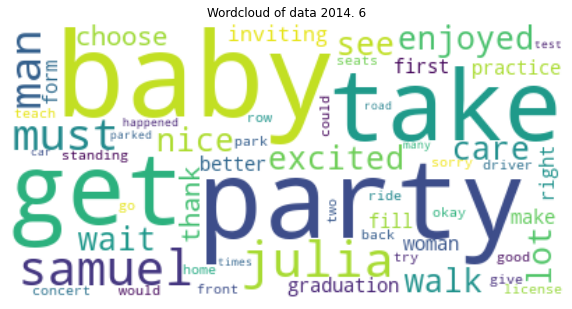

In [36]:
wordcloud1 = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3,
                    max_words=2000, background_color='white').generate(' '.join(words1))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of data 2014. 6")
#wordcloud.to_file('Wordcloud2014.png')

Text(0.5, 1.0, 'Wordcloud of data 2014. 9')

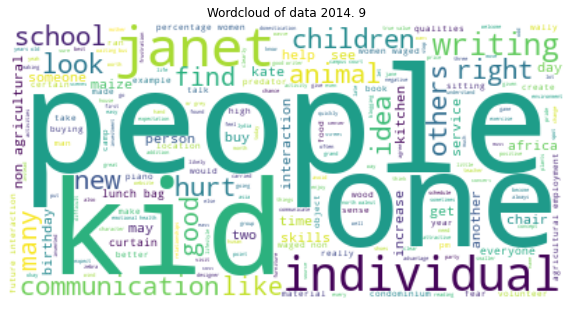

In [37]:
wordcloud2 = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3,
                    max_words=2000, background_color='white').generate(' '.join(words2))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of data 2014. 9")
#wordcloud.to_file('Wordcloud2014.png')

Text(0.5, 1.0, 'Wordcloud of data 2014. 12')

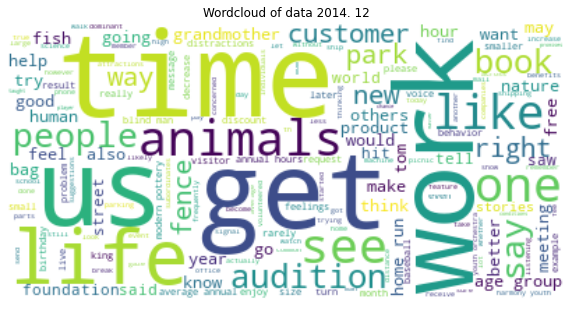

In [38]:
wordcloud3 = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3,
                    max_words=2000, background_color='white').generate(' '.join(words3))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of data 2014. 12")
#wordcloud.to_file('Wordcloud2014.png')

# Word frequency (skip to compare)
single text analysis

In [116]:
fd = nltk.FreqDist(words).most_common(n=None)
# fd = nltk.FreqDist(words).most_common()
type(fd)

list

In [ ]:
df = pd.DataFrame(fd,columns = ['Word','Freq']) 
print(df)
df.to_csv('HFall.csv', index=False)

# Lexical analysis

In [31]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Var: wctext (clean data, no stopwords, lengh greater than 1)

In [39]:
text1 = wctext1
text2 = wctext2
text3 = wctext3

In [40]:
flt1 = ld.flemmatize(text1)
flt2 = ld.flemmatize(text2)
flt3 = ld.flemmatize(text3)

# Show first 10 items
print(flt1[1:10])
print(flt2[1:10])
print(flt3[1:10])

['must', 'enjoy', 'party', 'lot', 'nice', 'take', 'care', 'baby', 'excite']
['wish', 'sure', 'take', 'many', 'picture', 'right', 'best', 'athlete', 'let']
['go', 'bed', 'let', 'buy', 'apartment', 'sleep', 'better', 'medicine', 'neighbors']


In [42]:
ttr1 = ld.ttr(flt1)
ttr2 = ld.ttr(flt2)
ttr3 = ld.ttr(flt3)
print(ttr1, ttr2, ttr3)

0.873015873015873 0.537874339401057 0.48446833930704897


In [44]:
rttr1 = ld.root_ttr(flt1)
rttr2 = ld.root_ttr(flt2)
rttr3 = ld.root_ttr(flt3)
print(rttr1,rttr2, rttr3)

6.929348671835832 22.196686574607664 19.821801713719587


In [46]:
logttr1 = ld.log_ttr(flt1)
logttr2 = ld.log_ttr(flt2)
logttr3 = ld.log_ttr(flt3)
print(logttr1,logttr2, logttr3)

0.9672225138386127 0.9166507943183019 0.9023702002305946


In [47]:
msttr1 = ld.maas_ttr(flt1)
msttr2 = ld.maas_ttr(flt2)
msttr3 = ld.maas_ttr(flt3)

print(msttr1,msttr2,msttr3)

0.01821638831589777 0.02579500737725759 0.03028449309287643


In [48]:
# Default window length = 50
fdttr1 = ld.msttr(flt1)
fdttr2 = ld.msttr(flt1)
# fdttr2 = ld.msttr(flt1,window_length=1000)
fdttr3 = ld.msttr(flt3)

print(fdttr1, fdttr2, fdttr3)

0.9 0.9 0.8127272727272725


In [49]:
mattr1 = ld.mattr(flt1); mattr2 = ld.mattr(flt2); mattr3 = ld.mattr(flt3)
# mattr2 = ld.mattr(flt1,window_length=25); ld.mattr(flt2, window_length=25); ld.mattr(flt3, window_length=25)

print(mattr1, mattr2, mattr3)

0.9000000000000001 0.8256952841596124 0.8175261538461566


In [51]:
hdd1 = ld.hdd(flt1)
hdd2 = ld.hdd(flt2)
hdd3 = ld.hdd(flt3)

print(hdd1, hdd2, hdd3)

0.9124130173839337 0.9730768881985163 0.9652219322282145


In [53]:
mtld1 = ld.mtld(flt1)
mtld2 = ld.mtld(flt2)
mtld3 = ld.mtld(flt3)

print(mtld1, mtld2, mtld3)

138.91500000000002 161.4305432894691 112.7199308129928


In [54]:
bilog1 = ld.mtld_ma_wrap(flt1)
bilog2 = ld.mtld_ma_wrap(flt2)
bilog3 = ld.mtld_ma_wrap(flt3)

print(bilog1, bilog2, bilog3)

77.0 176.99001761597182 141.2909199522103


In [56]:
ma1 = ld.mtld_ma_bid(flt1)
ma2 = ld.mtld_ma_bid(flt2)
ma3 = ld.mtld_ma_bid(flt3)

print(ma1, ma2, ma3)

0.0 168.10457979735452 127.52267962645321


# Lexical diversity indices summary

In [58]:
import numpy as np
import pandas as pd
vect1=np.zeros(10)
vect2=np.ones(10)
# vect3=np.three(10)
df=pd.DataFrame({'col1':vect1,'col2':vect2})

In [60]:
c0 = list(range(1,11))
c1 = list([ttr1, rttr1, logttr1, msttr1, fdttr1, mattr1, hdd1, mtld1, bilog1, ma1])
c2 = list([ttr2, rttr2, logttr2, msttr2, fdttr2, mattr2, hdd2, mtld2, bilog2, ma2])
c3 = list([ttr3, rttr3, logttr3, msttr3, fdttr3, mattr3, hdd3, mtld3, bilog3, ma3])
c4 = list(['TTR','RootTTR','LogTTR','MassTTR','MSTTR','MATTR','HDD','MTLD','BILOGTTR','MofLTD'])
          
df = pd.DataFrame({'Index':c0, 'Measures':c4,'Text1':c1, 'Text2':c2, 'Text3':c3})

df

,Index,Measures,Text1,Text2,Text3
0,1,TTR,0.873016,0.537874,0.484468
1,2,RootTTR,6.929349,22.196687,19.821802
2,3,LogTTR,0.967223,0.916651,0.902370
3,4,MassTTR,0.018216,0.025795,0.030284
4,5,MSTTR,0.900000,0.900000,0.812727
5,6,MATTR,0.900000,0.825695,0.817526
6,7,HDD,0.912413,0.973077,0.965222
7,8,MTLD,138.915000,161.430543,112.719931
8,9,BILOGTTR,77.000000,176.990018,141.290920
9,10,MofLTD,0.000000,168.104580,127.522680


# Below is practice